In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum().sum()

0

In [8]:
df['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [9]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
df['quality'] -= 2

In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,4
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3


In [13]:
df['quality'].unique()

array([3, 4, 5, 2, 6, 1], dtype=int64)

In [14]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

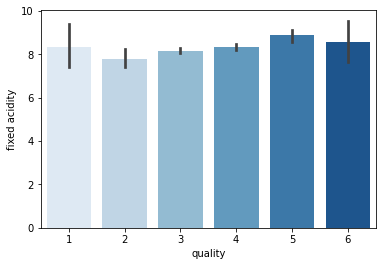

In [15]:
sns.barplot(x = "quality", y = "fixed acidity", data = df, palette = "Blues")
plt.show()

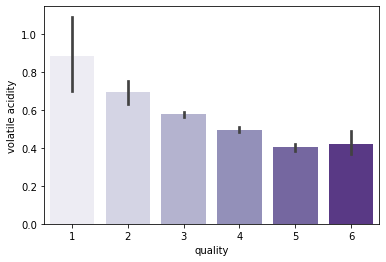

In [16]:
sns.barplot(x = "quality", y = "volatile acidity", data = df, palette = "Purples")
plt.show()

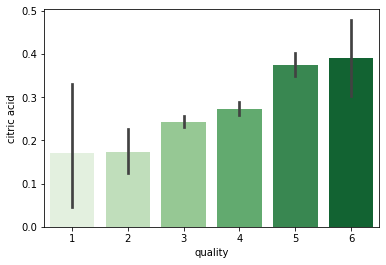

In [17]:
sns.barplot(x = "quality", y = "citric acid", data = df, palette = "Greens")
plt.show()

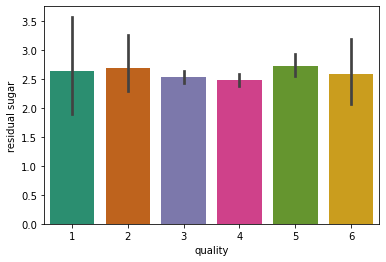

In [18]:
sns.barplot(x = "quality", y = "residual sugar", data = df, palette = "Dark2")
plt.show()

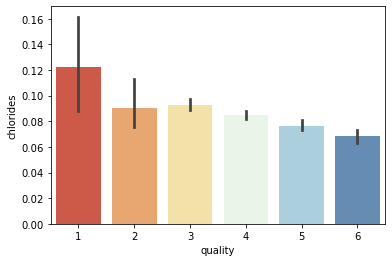

In [19]:
sns.barplot(x = "quality", y = "chlorides", data = df, palette = "RdYlBu")
plt.show()

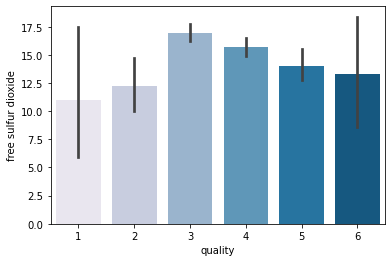

In [20]:
sns.barplot(x = "quality", y = "free sulfur dioxide", data = df, palette = "PuBu")
plt.show()

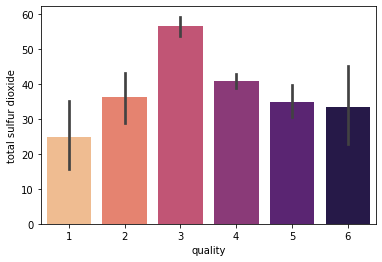

In [21]:
sns.barplot(x = "quality", y = "total sulfur dioxide", data = df, palette = "magma_r")
plt.show()

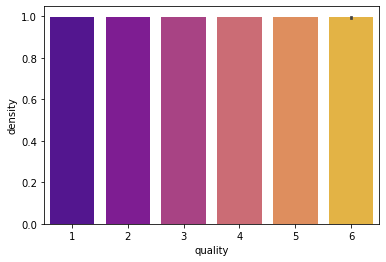

In [22]:
sns.barplot(x = "quality", y = "density", data = df, palette = "plasma")
plt.show()

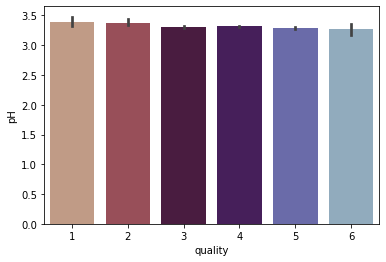

In [23]:
sns.barplot(x = "quality", y = "pH", data = df, palette = "twilight_r")
plt.show()

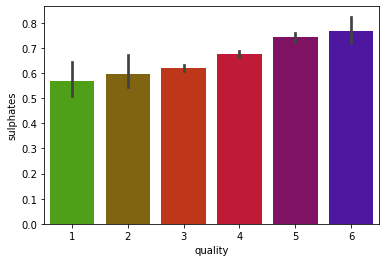

In [24]:
sns.barplot(x = "quality", y = "sulphates", data = df, palette = "brg_r")
plt.show()

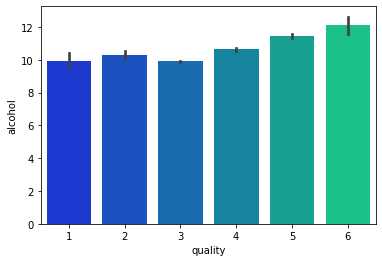

In [25]:
sns.barplot(x = "quality", y = "alcohol", data = df, palette = "winter")
plt.show()

In [26]:
df = df.drop(["fixed acidity", "residual sugar", "free sulfur dioxide", "total sulfur dioxide", "density"], axis = 1)

In [27]:
df.columns

Index(['volatile acidity', 'citric acid', 'chlorides', 'pH', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')

In [28]:
df.head()

,volatile acidity,citric acid,chlorides,pH,sulphates,alcohol,quality
0,0.70,0.00,0.076,3.51,0.56,9.4,3
1,0.88,0.00,0.098,3.20,0.68,9.8,3
2,0.76,0.04,0.092,3.26,0.65,9.8,3
3,0.28,0.56,0.075,3.16,0.58,9.8,4
4,0.70,0.00,0.076,3.51,0.56,9.4,3


# Scaling

In [29]:
standard_scaler = StandardScaler()

In [30]:
df[df.columns[:-1]] = standard_scaler.fit_transform(df[df.columns[:-1]])

In [31]:
df.head()

,volatile acidity,citric acid,chlorides,pH,sulphates,alcohol,quality
0,0.961877,-1.391472,-0.243707,1.288643,-0.579207,-0.960246,3
1,1.967442,-1.391472,0.223875,-0.719933,0.128950,-0.584777,3
2,1.297065,-1.186070,0.096353,-0.331177,-0.048089,-0.584777,3
3,-1.384443,1.484154,-0.264960,-0.979104,-0.461180,-0.584777,4
4,0.961877,-1.391472,-0.243707,1.288643,-0.579207,-0.960246,3


# Train Test Split

In [32]:
len(df)

1599

In [33]:
X = df.drop(['quality'], axis = 1)
y = df['quality']

In [34]:
X.head()

,volatile acidity,citric acid,chlorides,pH,sulphates,alcohol
0,0.961877,-1.391472,-0.243707,1.288643,-0.579207,-0.960246
1,1.967442,-1.391472,0.223875,-0.719933,0.128950,-0.584777
2,1.297065,-1.186070,0.096353,-0.331177,-0.048089,-0.584777
3,-1.384443,1.484154,-0.264960,-0.979104,-0.461180,-0.584777
4,0.961877,-1.391472,-0.243707,1.288643,-0.579207,-0.960246


In [35]:
y.head()

0    3
1    3
2    3
3    4
4    3
Name: quality, dtype: int64

In [36]:
X.shape, y.shape

((1599, 6), (1599,))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
X_train.head()

,volatile acidity,citric acid,chlorides,pH,sulphates,alcohol
642,0.068040,0.919299,-0.349975,0.511130,-0.225128,-0.960246
679,-1.496173,0.919299,-0.583766,-1.173483,-0.697233,-0.772512
473,-0.993390,1.432803,-0.541259,-0.331177,0.778094,0.166161
390,1.799848,-1.134720,-0.902572,1.612607,0.955133,2.325108
1096,1.101539,-0.929318,0.627696,0.251958,-0.992298,0.353895


In [39]:
y_train.head()

642     3
679     3
473     3
390     6
1096    4
Name: quality, dtype: int64

In [40]:
X_train.shape, y_train.shape

((1279, 6), (1279,))

In [41]:
X_test.shape, y_train.shape

((320, 6), (1279,))

# Support Vector Machines

In [42]:
accuracies = {}

In [43]:
svm_rbf = SVC(kernel = "rbf")

In [44]:
svm_rbf.fit(X_train, y_train)

SVC()

In [45]:
svm_rbf_y_pred = svm_rbf.predict(X_test)

In [46]:
accuracy_score(y_test, svm_rbf_y_pred) * 100

63.4375

In [47]:
print("Accuracy Score:", accuracy_score(y_test, svm_rbf_y_pred)*100)

Accuracy Score: 63.4375


In [48]:
accuracies["SVM_RBF"] = accuracy_score(y_test, svm_rbf_y_pred)*100

In [49]:
svm_linear = SVC(kernel = "linear")

In [50]:
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [51]:
svm_linear_y_pred = svm_linear.predict(X_test)

In [52]:
acc = accuracy_score(y_test, svm_linear_y_pred) * 100

In [53]:
print("Accuracy Score:", acc)

Accuracy Score: 60.0


In [54]:
accuracies["SVM_LINEAR"] = acc

In [55]:
svm_poly = SVC(kernel = "poly", degree = 3)

In [56]:
svm_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [57]:
svm_poly_y_pred = svm_poly.predict(X_test)

In [58]:
acc = accuracy_score(y_test, svm_poly_y_pred) * 100

In [59]:
print("Accuracy Score:", acc)

Accuracy Score: 60.9375


In [60]:
accuracies["SVM_POLY"] = acc

# Decision Tree Classifier

In [61]:
tree = DecisionTreeClassifier(splitter = "best")

In [62]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
tree_y_pred = tree.predict(X_test)

In [64]:
acc = accuracy_score(y_test, tree_y_pred) * 100

In [65]:
print("Accuracy Score:", acc)

Accuracy Score: 61.5625


In [66]:
accuracies["TREE"] = acc

# Random Forest Classifier

In [67]:
rfc = RandomForestClassifier(n_estimators = 100)

In [68]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
rfc_y_pred = rfc.predict(X_test)

In [70]:
acc = accuracy_score(y_test, rfc_y_pred) * 100

In [71]:
print("Accuracy Score:", acc)

Accuracy Score: 71.875


In [72]:
accuracies["RANDOM_FOREST_CLASSIFIER"] = acc

# Naive Bayes

In [73]:
nb = GaussianNB()

In [74]:
nb.fit(X_train, y_train)

GaussianNB()

In [75]:
nb_y_pred = nb.predict(X_test)

In [76]:
acc = accuracy_score(y_test, nb_y_pred) * 100

In [77]:
print("Accuracy Score:", acc)

Accuracy Score: 54.6875


In [78]:
accuracies["NAIVE_BAYES"] = acc

# K Nearest Neighbors Classifier

In [79]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [80]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [81]:
knn_y_pred = knn.predict(X_test)

In [82]:
acc = accuracy_score(y_test, knn_y_pred) * 100

In [83]:
print("Accuracy Score:", acc)

Accuracy Score: 60.3125


In [84]:
accuracies["KNN"] = acc

In [107]:
accuracies

{'SVM_RBF': 63.4375,
 'SVM_LINEAR': 60.0,
 'SVM_POLY': 60.9375,
 'TREE': 61.5625,
 'RANDOM_FOREST_CLASSIFIER': 71.875,
 'NAIVE_BAYES': 54.6875,
 'KNN': 60.3125}

In [125]:
pd.Series(accuracies, index = accuracies.keys()).sort_values(ascending = True)

NAIVE_BAYES                 54.6875
SVM_LINEAR                  60.0000
KNN                         60.3125
SVM_POLY                    60.9375
TREE                        61.5625
SVM_RBF                     63.4375
RANDOM_FOREST_CLASSIFIER    71.8750
dtype: float64